## Settings

In [1]:
# 一つ上の階層からモジュールを参照できるようにする
import sys
sys.path.append('..')

In [2]:
# モジュールの変更を自動的に反映する
%load_ext autoreload
%autoreload 2

In [3]:
# loggingの設定を行う
from datetime import datetime, timezone, timedelta
today = datetime.now(timezone(timedelta(hours=9)))
exp_version = today.strftime('%Y%m%d')

import os
os.environ['exp_version'] = exp_version

from logs.logger import create_logger
create_logger(exp_version)

In [4]:
import numpy as np
import pandas as pd
from features.funcs import load_feather
from evals.funcs import get_pred_result, get_acc_and_logloss, print_conf_matrix
from models.xgb import ModelXGB, ModelXGBSklearn
import xgboost as xgb

In [5]:
input_files = os.listdir('../input/')
print(input_files)

['test.csv', 'train.csv', 'gender_submission.csv']


In [6]:
base_path = '../input/'
train_df = pd.read_csv(base_path + 'train.csv')
test_df = pd.read_csv(base_path + 'test.csv')
print(f'Columns in the training data ({train_df.shape[1]}):')
print(train_df.columns)
print()
print(f'Columns in the test data ({test_df.shape[1]}):')
print(test_df.columns)

Columns in the training data (12):
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns in the test data (11):
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [7]:
def load_data():
    train_x = train_df.drop(['Survived'], axis=1)
    train_y = train_df['Survived']
    test_x = test_df
    return train_x, train_y, test_x

## ModelXGB

### Base

In [8]:
train_x, train_y, test_x = load_data()
train_x = train_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_x = test_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)
base_path = '../features/'
train_x = load_feather(train_x, base_path + 'sex_train.feather', 'Sex')
test_x = load_feather(test_x, base_path + 'sex_test.feather', 'Sex')
train_x = load_feather(train_x, base_path + 'embarked_train.feather', 'Embarked')
test_x = load_feather(test_x, base_path + 'embarked_test.feather', 'Embarked')

In [9]:
model = ModelXGB(logging=True, model_name='base_model', verbose_eval=False)
pred_train1, preds_test1 = get_pred_result(model, train_x, train_y, test_x)

[INFO] 2021-02-07 14:22:36,299 >>	=== XGB MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:36,300 >>	PARAMS: {'model_name': 'base_model', 'num_round': 10}


In [10]:
get_acc_and_logloss(pred_train1, train_y, logging=True)
print_conf_matrix(pred_train1, train_y)

[INFO] 2021-02-07 14:22:36,415 >>	ACCURACY: 0.8181818181818182
[INFO] 2021-02-07 14:22:36,416 >>	LOGLOSS: 0.43778297150827417
[INFO] 2021-02-07 14:22:36,417 >>	data size: 891
[INFO] 2021-02-07 14:22:36,417 >>	correct predictions: 729
[INFO] 2021-02-07 14:22:36,418 >>	


[[492  57]
 [105 237]]


### Without Embarked

In [11]:
train_x, train_y, test_x = load_data()
train_x = train_x.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)
test_x = test_x.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=1)
base_path = '../features/'
train_x = load_feather(train_x, base_path + 'sex_train.feather', 'Sex')
test_x = load_feather(test_x, base_path + 'sex_test.feather', 'Sex')

In [12]:
model = ModelXGB(logging=True, model_name='without_emberked_col', verbose_eval=False)
pred_train1, preds_test1 = get_pred_result(model, train_x, train_y, test_x)

[INFO] 2021-02-07 14:22:36,566 >>	=== XGB MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:36,568 >>	PARAMS: {'model_name': 'without_emberked_col', 'num_round': 10}


In [13]:
get_acc_and_logloss(pred_train1, train_y, logging=True)

[INFO] 2021-02-07 14:22:36,691 >>	ACCURACY: 0.8181818181818182
[INFO] 2021-02-07 14:22:36,692 >>	LOGLOSS: 0.44077309764143996
[INFO] 2021-02-07 14:22:36,692 >>	data size: 891
[INFO] 2021-02-07 14:22:36,693 >>	correct predictions: 729
[INFO] 2021-02-07 14:22:36,694 >>	


### With AgeGroup

In [14]:
train_x, train_y, test_x = load_data()
train_x = train_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)
test_x = test_x.drop(['Name', 'Cabin', 'Ticket'], axis=1)
base_path = '../features/'
train_x = load_feather(train_x, base_path + 'sex_train.feather', 'Sex')
test_x = load_feather(test_x, base_path + 'sex_test.feather', 'Sex')
train_x = load_feather(train_x, base_path + 'embarked_train.feather', 'Embarked')
test_x = load_feather(test_x, base_path + 'embarked_test.feather', 'Embarked')
train_x = load_feather(train_x, base_path + 'age_train.feather', 'AgeGroup')
test_x = load_feather(test_x, base_path + 'age_test.feather', 'AgeGroup')

In [15]:
model = ModelXGB(logging=True, model_name='with_age_group_col', verbose_eval=False)
pred_train, preds_test = get_pred_result(model, train_x, train_y, test_x)

[INFO] 2021-02-07 14:22:36,819 >>	=== XGB MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:36,820 >>	PARAMS: {'model_name': 'with_age_group_col', 'num_round': 10}


In [16]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:22:36,929 >>	ACCURACY: 0.8181818181818182
[INFO] 2021-02-07 14:22:36,930 >>	LOGLOSS: 0.43778297150827417
[INFO] 2021-02-07 14:22:36,930 >>	data size: 891
[INFO] 2021-02-07 14:22:36,931 >>	correct predictions: 729
[INFO] 2021-02-07 14:22:36,932 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

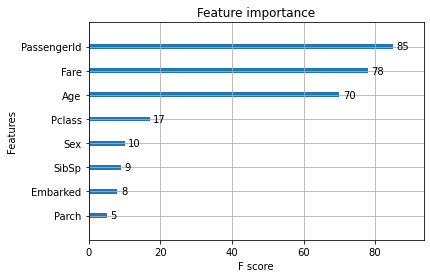

In [17]:
xgb.plot_importance(model.get_model())

### Without Embarked with different params

In [18]:
model = ModelXGB(num_round=15, verbose_eval=False, model_name='with_age_group_col_and_more_num_rounds', logging=True)
pred_train, preds_test = get_pred_result(model, train_x, train_y, test_x)

[INFO] 2021-02-07 14:22:37,527 >>	=== XGB MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:37,528 >>	PARAMS: {'model_name': 'with_age_group_col_and_more_num_rounds', 'num_round': 15}


In [19]:
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:22:37,643 >>	ACCURACY: 0.813692480359147
[INFO] 2021-02-07 14:22:37,644 >>	LOGLOSS: 0.4540425585102035
[INFO] 2021-02-07 14:22:37,644 >>	data size: 891
[INFO] 2021-02-07 14:22:37,645 >>	correct predictions: 725
[INFO] 2021-02-07 14:22:37,646 >>	


## ModelXGBSklearn

### Base

In [20]:
model = ModelXGBSklearn(n_estimators=15, learning_rate=0.2, verbose=False, model_name='sklearn', logging=True)
pred_train, preds_test = get_pred_result(model, train_x, train_y, test_x)
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:22:37,694 >>	=== XGB SKLEARN MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:37,695 >>	PARAMS: {'model_name': 'sklearn', 'n_estimator': 15, 'learning_rate': 0.2, 'max_depth': None}
[INFO] 2021-02-07 14:22:37,784 >>	ACCURACY: 0.819304152637486
[INFO] 2021-02-07 14:22:37,784 >>	LOGLOSS: 2.9124730334852402
[INFO] 2021-02-07 14:22:37,785 >>	data size: 891
[INFO] 2021-02-07 14:22:37,786 >>	correct predictions: 730
[INFO] 2021-02-07 14:22:37,786 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

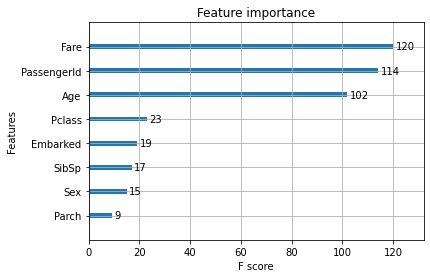

In [21]:
xgb.plot_importance(model.get_model())

### With different params

In [22]:
model = ModelXGBSklearn(n_estimators=100, learning_rate=0.03, verbose=False, logging=True, model_name='slearn')
pred_train, preds_test = get_pred_result(model, train_x, train_y, test_x)
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:22:38,046 >>	=== XGB SKLEARN MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:38,047 >>	PARAMS: {'model_name': 'slearn', 'n_estimator': 100, 'learning_rate': 0.03, 'max_depth': None}
[INFO] 2021-02-07 14:22:38,284 >>	ACCURACY: 0.819304152637486
[INFO] 2021-02-07 14:22:38,285 >>	LOGLOSS: 2.9124730334828772
[INFO] 2021-02-07 14:22:38,286 >>	data size: 891
[INFO] 2021-02-07 14:22:38,286 >>	correct predictions: 730
[INFO] 2021-02-07 14:22:38,287 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

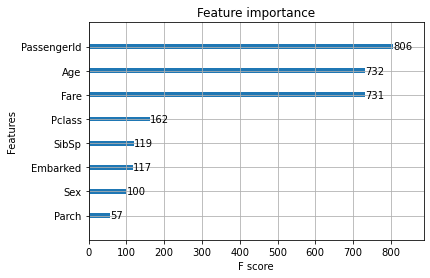

In [23]:
xgb.plot_importance(model.get_model())

### With different params

In [24]:
model = ModelXGBSklearn(n_estimators=20, learning_rate=0.2, verbose=False, max_depth=None, logging=True, model_name='sklearn_without_passenger_id')
pred_train, preds_test = get_pred_result(model, train_x.drop('PassengerId', axis=1), train_y, test_x.drop('PassengerId', axis=1))
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:22:38,596 >>	=== XGB SKLEARN MODEL LOGGING STARTED ===
[INFO] 2021-02-07 14:22:38,596 >>	PARAMS: {'model_name': 'sklearn_without_passenger_id', 'n_estimator': 20, 'learning_rate': 0.2, 'max_depth': None}
[INFO] 2021-02-07 14:22:38,709 >>	ACCURACY: 0.8226711560044894
[INFO] 2021-02-07 14:22:38,710 >>	LOGLOSS: 2.858203351492528
[INFO] 2021-02-07 14:22:38,711 >>	data size: 891
[INFO] 2021-02-07 14:22:38,719 >>	correct predictions: 733
[INFO] 2021-02-07 14:22:38,721 >>	


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

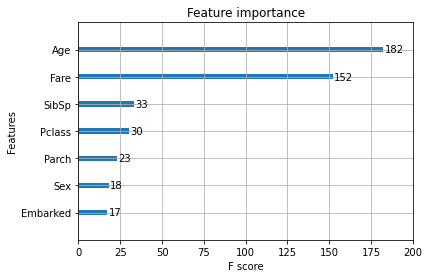

In [25]:
xgb.plot_importance(model.get_model())

It seems that Age is the most deciding factor in this model. This is understandable if we recall the scene of the famous Titanic movie.

### GridSearchCV

#### Base

In [26]:
from sklearn.model_selection import GridSearchCV

params = {
    'objective':['binary:logistic'],
    'learning_rate': [0.025, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [5, 10, 15, 20, 40, 60, 100],
    'silent': [1],
    'n_estimators': [5, 10, 15, 20, 40, 60, 100, 1000],
    'seed': [1]
}

In [27]:
model = xgb.XGBClassifier()
clf = GridSearchCV(model, params, n_jobs=5, scoring='accuracy', verbose=2, refit=False)
clf.fit(train_x, train_y)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 297 tasks      | elapsed:   16.7s
[Parallel(n_jobs=5)]: Done 690 tasks      | elapsed:   33.0s
[Parallel(n_jobs=5)]: Done 1256 tasks      | elapsed:   53.8s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   59.8s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_j

In [28]:
clf.best_score_

0.8193710375996485

In [29]:
clf.best_params_

{'learning_rate': 0.3,
 'max_depth': 15,
 'n_estimators': 5,
 'objective': 'binary:logistic',
 'seed': 1,
 'silent': 1}

#### Without PassengerId

In [30]:
clf_2 = GridSearchCV(model, params, n_jobs=5, scoring='accuracy', verbose=2, refit=False)
clf_2.fit(train_x.drop('PassengerId', axis=1), train_y)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 363 tasks      | elapsed:   15.7s
[Parallel(n_jobs=5)]: Done 770 tasks      | elapsed:   33.8s
[Parallel(n_jobs=5)]: Done 1336 tasks      | elapsed:   55.7s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   59.1s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_j

In [31]:
clf_2.best_score_

0.831680371602536

In [32]:
clf_2.best_params_

{'learning_rate': 0.05,
 'max_depth': 20,
 'n_estimators': 60,
 'objective': 'binary:logistic',
 'seed': 1,
 'silent': 1}

### GridSearch against KFold

In [33]:
from sklearn.model_selection import KFold

best_params_lst = []
kf = KFold(n_splits=4, shuffle=True, random_state=1)

for tr_idx, va_idx in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    model = xgb.XGBClassifier()
    clf_3 = GridSearchCV(model, params, n_jobs=5, scoring='accuracy', verbose=2, refit=False)
    clf_3.fit(tr_x.drop('PassengerId', axis=1), tr_y)

    best_params_lst.append({'best_params': clf_3.best_params_, 'best_score': clf_3.best_score_})

Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 488 tasks      | elapsed:   13.4s
[Parallel(n_jobs=5)]: Done 1300 tasks      | elapsed:   35.0s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   39.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 404 tasks      | elapsed:   13.3s
[Parallel(n_jobs=5)]: Done 810 tasks      | elapsed:   24.9s
[Parallel(n_jobs=5)]: Done 1376 tasks      | elapsed:   39.8s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   41.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 404 tasks      | elapsed:   12.7s
[Parallel(n_jobs=5)]: Done 810 tasks      | elapsed:   25.4s
[Parallel(n_jobs=5)]: Done 1376 tasks      | elapsed:   40.8s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   42.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 5 folds for each of 280 candidates, totalling 1400 fits


[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:   15.0s
[Parallel(n_jobs=5)]: Done 1310 tasks      | elapsed:   37.0s
[Parallel(n_jobs=5)]: Done 1391 out of 1400 | elapsed:   39.5s remaining:    0.3s
[Parallel(n_jobs=5)]: Done 1400 out of 1400 | elapsed:   40.3s finished


In [34]:
best_params_lst

[{'best_params': {'learning_rate': 0.2,
   'max_depth': 5,
   'n_estimators': 5,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.848793625855684},
 {'best_params': {'learning_rate': 0.1,
   'max_depth': 5,
   'n_estimators': 60,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.8457973291437548},
 {'best_params': {'learning_rate': 0.1,
   'max_depth': 5,
   'n_estimators': 100,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.812894175737852},
 {'best_params': {'learning_rate': 0.2,
   'max_depth': 5,
   'n_estimators': 40,
   'objective': 'binary:logistic',
   'seed': 1,
   'silent': 1},
  'best_score': 0.8221860621703513}]

In [35]:
print('learning_rate: 0.1/0.2')
print('max_depth: 5')
print('n_estimator: 5/60')

learning_rate: 0.1/0.2
max_depth: 5
n_estimator: 5/60


### Create model based on GridSearch

In [36]:
model = ModelXGBSklearn(n_estimators=5, learning_rate=0.2, verbose=False, max_depth=5, logging=True, model_name='grid_search')
pred_train, preds_test = get_pred_result(model, train_x.drop('PassengerId', axis=1), train_y, test_x.drop('PassengerId', axis=1))
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:27:22,077 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-07 14:27:22,078 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 5, 'learning_rate': 0.2, 'max_depth': 5}
[INFO] 2021-02-07 14:27:22,126 >>	ACCURACY: 0.8215488215488216
[INFO] 2021-02-07 14:27:22,127 >>	LOGLOSS: 2.8762932454855696
[INFO] 2021-02-07 14:27:22,128 >>	data size: 891
[INFO] 2021-02-07 14:27:22,128 >>	correct predictions: 732
[INFO] 2021-02-07 14:27:22,129 >>	


In [37]:
model = ModelXGBSklearn(n_estimators=60, learning_rate=0.1, verbose=False, max_depth=5, logging=True, model_name='grid_search')
pred_train, preds_test = get_pred_result(model, train_x.drop('PassengerId', axis=1), train_y, test_x.drop('PassengerId', axis=1))
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:27:22,177 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-07 14:27:22,178 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 60, 'learning_rate': 0.1, 'max_depth': 5}
[INFO] 2021-02-07 14:27:22,309 >>	ACCURACY: 0.8271604938271605
[INFO] 2021-02-07 14:27:22,310 >>	LOGLOSS: 2.78584377550382
[INFO] 2021-02-07 14:27:22,311 >>	data size: 891
[INFO] 2021-02-07 14:27:22,311 >>	correct predictions: 737
[INFO] 2021-02-07 14:27:22,312 >>	


In [38]:
model = ModelXGBSklearn(n_estimators=100, learning_rate=0.1, verbose=False, max_depth=5, logging=True, model_name='grid_search')
pred_train, preds_test = get_pred_result(model, train_x.drop('PassengerId', axis=1), train_y, test_x.drop('PassengerId', axis=1))
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:27:22,360 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-07 14:27:22,361 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 100, 'learning_rate': 0.1, 'max_depth': 5}
[INFO] 2021-02-07 14:27:22,553 >>	ACCURACY: 0.8170594837261503
[INFO] 2021-02-07 14:27:22,554 >>	LOGLOSS: 2.9486528214766405
[INFO] 2021-02-07 14:27:22,555 >>	data size: 891
[INFO] 2021-02-07 14:27:22,556 >>	correct predictions: 728
[INFO] 2021-02-07 14:27:22,556 >>	


In [39]:
model = ModelXGBSklearn(n_estimators=40, learning_rate=0.2, verbose=False, max_depth=5, logging=True, model_name='grid_search')
pred_train, preds_test = get_pred_result(model, train_x.drop('PassengerId', axis=1), train_y, test_x.drop('PassengerId', axis=1))
get_acc_and_logloss(pred_train, train_y, logging=True)

[INFO] 2021-02-07 14:27:22,603 >>	=== XGB SKLEARN MODEL ===
[INFO] 2021-02-07 14:27:22,604 >>	PARAMS: {'model_name': 'grid_search', 'n_estimator': 40, 'learning_rate': 0.2, 'max_depth': 5}
[INFO] 2021-02-07 14:27:22,700 >>	ACCURACY: 0.8226711560044894
[INFO] 2021-02-07 14:27:22,701 >>	LOGLOSS: 2.858203351493119
[INFO] 2021-02-07 14:27:22,701 >>	data size: 891
[INFO] 2021-02-07 14:27:22,702 >>	correct predictions: 733
[INFO] 2021-02-07 14:27:22,703 >>	


### Submission

In [40]:
model = ModelXGBSklearn(n_estimators=60, learning_rate=0.1, verbose=False, max_depth=5, logging=False, model_name='submission')
model.model.fit(train_x.drop('PassengerId', axis=1), train_y, eval_metric='logloss', eval_set=[(train_x.drop('PassengerId', axis=1), train_y)], verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=60, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
prediction = model.predict(test_x.drop('PassengerId', axis=1))

In [42]:
submission = pd.DataFrame({'PassengerId': test_x['PassengerId'].values, 'Survived': prediction})

In [47]:
submission_file_path = 'submissions/xgb_submission_{}.csv'.format(today.strftime('%Y%m%d'))
submission.to_csv(submission_file_path, index=False)